In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

from windmark.core.architecture.processors import smoothen
from windmark.core.constructs.general import Tokens

In [2]:
sns.set_theme(rc={'figure.figsize':(16,6)})

/tmp/ipykernel_2968406/4184242031.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graphic.set_xticklabels(labels)


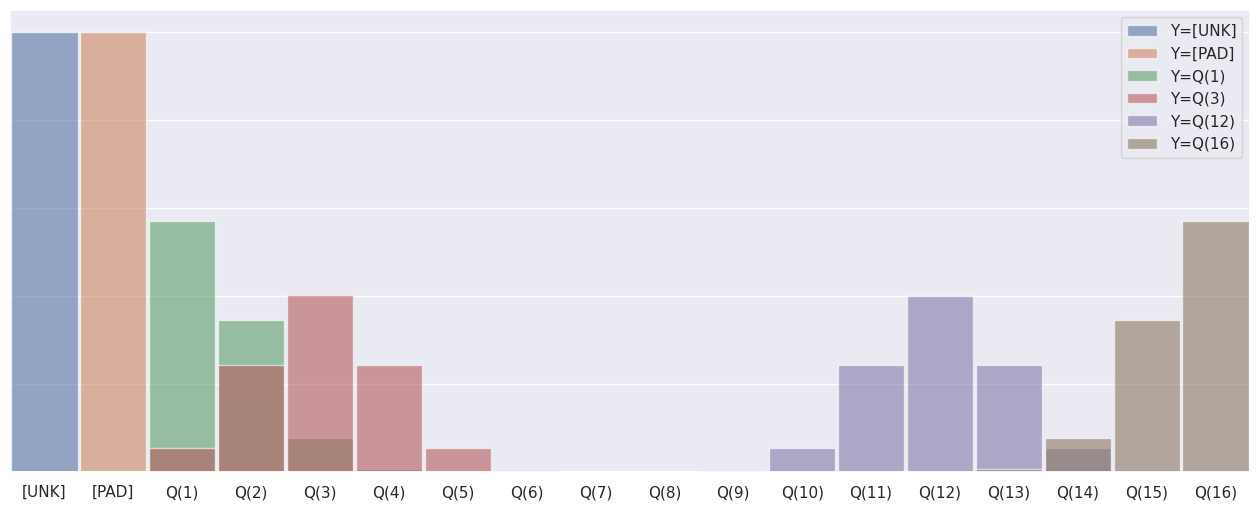

In [34]:
Q = 16

n_plots = 3

fig, ax = plt.subplots()

for target in [Tokens.UNK , Tokens.PAD, len(Tokens), 2 + len(Tokens), 11 + len(Tokens), Q + len(Tokens) - 1]:

    targets = smoothen(targets=torch.tensor([[target]]), size=Q, sigma=1.0).squeeze(0, 1)

    graphic = sns.barplot(targets.numpy(), gap=-.2)

    labels = [f'[{token}]' for token in Tokens._member_names_] + [f'Q({q+1})' for q in range(Q)]
    
for container in graphic.containers:
    for bar in container:
        bar.set_alpha(0.6)

graphic.set_xticklabels(labels)

graphic.set(yticklabels=[]) 
graphic.set(ylabel=None) 
graphic.tick_params(left=False)

graphic.legend(handles=graphic.containers[::], labels=[
    "Y=[UNK]","Y=[PAD]","Y=Q(1)","Y=Q(3)","Y=Q(12)","Y=Q(16)"
])


plt.savefig("../docs/diagrams/smoothing.svg")
plt.show()

In [4]:
[e.value for e in Tokens]

[0, 1]

In [5]:
Tokens._member_names_

['UNK', 'PAD']